# Metrics Comparison Tool

This notebook is a tool to visualize and compare the Human Metric with any other metric in the PLCTestbench.

In [ ]:
from functools import partial
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from tabulate import tabulate
from IPython.display import Markdown, display
from matplotlib.colors import LinearSegmentedColormap
from collections import defaultdict
import pandas as pd
from scipy.stats import spearmanr
from plctestbench.settings import *
from plctestbench.plc_testbench import PLCTestbench
from plctestbench.loss_simulator import BinomialPLS, GilbertElliotPLS, MetronomePLS
from plctestbench.plc_algorithm import AdvancedPLC, ZerosPLC, LastPacketPLC, LowCostPLC, BurgPLC, ExternalPLC
from plctestbench.output_analyser import MSECalculator, MAECalculator, PEAQCalculator, PerceptualCalculator, HumanCalculator

from plctestbench.worker import OriginalAudio

### Cello

In [26]:
# 8684677083259884

original_audio_tracks = [(OriginalAudio, OriginalAudioSettings('Cello_example_mono.wav'))]

packet_loss_simulators = [(MetronomePLS, MetronomePLSSettings(packet_size=64, period=1500, duration=2, offset=700)),]

metrics = [(HumanCalculator, HumanCalculatorSettings(single_loss_per_stimulus=True, stimulus_length=3000, iterations=2, reference="cello_reference.wav", anchor="cello_anchor.wav")),]

In [44]:
# 51331769944968324

original_audio_tracks = [(OriginalAudio, OriginalAudioSettings('Cello_example_mono.wav'))]

packet_loss_simulators = [(MetronomePLS, MetronomePLSSettings(packet_size=64, period=1500, duration=2, offset=1000)),]

metrics = [(HumanCalculator, HumanCalculatorSettings(single_loss_per_stimulus=True, stimulus_length=3000, iterations=2, reference="cello_reference.wav", anchor="cello_anchor.wav")),]

### Guitar

In [2]:
# 17898037803615409

original_audio_tracks = [(OriginalAudio, OriginalAudioSettings('Blues_Guitar.wav'))]

packet_loss_simulators = [(MetronomePLS, MetronomePLSSettings(packet_size=64, period=1500, duration=2, offset=800)),]

metrics = [(HumanCalculator, HumanCalculatorSettings(single_loss_per_stimulus=True, stimulus_length=3000, iterations=2, reference="guitar_reference.wav", anchor="guitar_anchor.wav")),]

In [56]:
# 40051167010282684

original_audio_tracks = [(OriginalAudio, OriginalAudioSettings('Blues_Guitar.wav'))]

packet_loss_simulators = [(MetronomePLS, MetronomePLSSettings(packet_size=64, period=1500, duration=2, offset=1000)),]

metrics = [(HumanCalculator, HumanCalculatorSettings(single_loss_per_stimulus=True, stimulus_length=3000, iterations=2, reference="guitar_reference.wav", anchor="guitar_anchor.wav")),]

In [27]:
additional_metrics = [(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 300, transform_type = 'cqt', linear_mag=False)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=False)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 4000, transform_type = 'cqt', linear_mag=False)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 5000, transform_type = 'cqt', linear_mag=False)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 6000, transform_type = 'cqt', linear_mag=False)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=False, bins_per_octave=48)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=20)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=20, minimum_window=256)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=20, minimum_window=512)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=20, minimum_window=1024)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=20, minimum_window=2048)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=10, minimum_window=2048)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=False, bins_per_octave=48, min_frequency=10, minimum_window=2048)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 4000, transform_type = 'cqt', linear_mag=False, bins_per_octave=48, min_frequency=10, minimum_window=2048)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 4000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=10, minimum_window=2048)),
# (PerceptualCalculator, PerceptualCalculatorSettings(masking=True, intorno_length = 4000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=10, minimum_window=2048)),
# (PerceptualCalculator, PerceptualCalculatorSettings(masking=True, intorno_length = 4000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=10, minimum_window=2048, masking_offset=1)),
# (PerceptualCalculator, PerceptualCalculatorSettings(masking=True, intorno_length = 4000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=10, minimum_window=2048, masking_offset=-1)),
# (PerceptualCalculator, PerceptualCalculatorSettings(masking=True, intorno_length = 4000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=10, minimum_window=2048, masking_offset=5)),
# (PerceptualCalculator, PerceptualCalculatorSettings(masking=True, intorno_length = 4000, transform_type = 'cqt', linear_mag=False, bins_per_octave=96, min_frequency=10, minimum_window=2048, masking_offset=-5)),
# (PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, transform_type = 'cqt', linear_mag=True)),
(PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 100, transform_type = 'dcgc')),
(MSECalculator, MSECalculatorSettings(N=64, hop=64)),
(MAECalculator, MAECalculatorSettings(N=64, hop=64)),]
# (PerceptualCalculator, PerceptualCalculatorSettings(masking=False, intorno_length = 3000, metric = 'weighted_sum')),
# (PerceptualCalculator, PerceptualCalculatorSettings(masking=True, intorno_length = 3000, metric = 'weighted_sum', db_weighting='A')),]

metrics += additional_metrics

In [ ]:
testbench_settings = {
    'root_folder': '../original_tracks',
    'db_ip': '100.79.187.69',
    'db_username': 'myUserAdmin',
    'db_password': 'admin',
}

plc_algorithms = [(ZerosPLC, ZerosPLCSettings())]

testbench = PLCTestbench(original_audio_tracks, packet_loss_simulators, plc_algorithms, metrics, testbench_settings)

In [ ]:
testbench.run()

In [ ]:
# %matplotlib inline
# testbench.plot(to_file=True, original_tracks=True, lost_samples_masks=True, output_analyses=True, show=True)

In [ ]:
class Element(object):
    def __init__(self, node):
        self.node = node
        class_type = ''
        class_name = self.node.worker.__class__.__name__
        self.name = None
        if 'OriginalAudio' in class_name:
            self.name =  self.node.get_track_name()
        elif 'PLS' in class_name:
            class_type = 'PLS'
        elif 'PLC' in class_name:
            class_type = 'PLC'
        elif 'Calculator' in class_name:
            class_type = 'Calculator'
        if self.name is None:
            self.name = class_name.split(class_type)[0]

    def __str__(self):
        return self.name

def group_identical_elements(elements):
    grouped = defaultdict(list)
    for element in elements:
        grouped[element.name].append(element)
    return list(grouped.values())

def extract_non_identical_pairs(*dictionaries):
    keys = dictionaries[0].keys()
    return {
        key: [d[key] for d in dictionaries]
        for key in keys
        if not all(d[key] == dictionaries[0][key] for d in dictionaries)
    }

def format_key_value_pairs(*dictionaries):
    # Extract non-identical pairs
    non_identical_pairs = extract_non_identical_pairs(*dictionaries)
    
    # Format the result
    result_strings = []
    for d in dictionaries:
        pairs = []
        for key in non_identical_pairs:
            initials = ''.join(word[0].upper() for word in key.split('_'))
            pairs.append(f'{initials}={d[key]}')
        result_strings.append(', '.join(pairs))
    
    return result_strings

def on_change(change, to_update):
    to_update.options = [element for element in change['new'].children]

def display_selection(title, previous_selection=None, selection_elements=None, single=True):
    widget = widgets.Select if single else widgets.SelectMultiple
    if previous_selection is not None:
        selection_elements = [Element(child) for child in previous_selection.value.node.children]
    elif selection_elements is None:
        raise ValueError('Either previously_selected_item or selection_items must be provided')
    
    for group in group_identical_elements(selection_elements):
        append_strings = format_key_value_pairs(*[element.node.settings.settings for element in group])
        for selection_element, append_string in zip(group, append_strings):
            selection_element.name+=f'({append_string})' if append_string else ''
    selected_element = widget(
        options = selection_elements,
        value = selection_elements[0] if single else selection_elements,
        description = f'{title}:',
        disabled = False,
        rows=len(selection_elements),
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
    if previous_selection is not None:
        previous_selection.observe(partial(on_change, to_update=selected_element), names='value')
    display(selected_element)
    return selected_element

def process_metrics(selected_metrics):
  metrics = {}
  for metric in selected_metrics.value:
    values = []
    if metric.name == 'Human':
        human_df = metric.node.worker.listening_test.results
    data = metric.node.get_data().get_error()
    data = data if data.ndim == 1 else list(zip(*data))[0]
    for idx, datapoint in enumerate(data):
      if datapoint != 0:
        if 'Human' in metric.name:
          values.append((idx+1, datapoint))
        else:
          values.append((idx, datapoint))
    metrics[metric.name] = values

  human_metric = metrics['Human']
  other_metrics = {key: value for key, value in metrics.items() if key != 'Human'}
  human_idxs = [idx for idx, _ in human_metric]
  max_human = max([value for _, value in human_metric])
  min_human = min([value for _, value in human_metric])

  for metric_name, metric in other_metrics.items():
    metric = [(idx, value**(1)) for idx, value in metric if idx in human_idxs]
    max_metric = max([value for _, value in metric])
    min_metric = min([value for _, value in metric])
    other_metrics[metric_name] = [(idx, (value-min_metric)/(max_metric-min_metric)*(max_human-min_human)+min_human) for idx, value in metric]

  for metric_name, metric in other_metrics.items():
    other_metrics[metric_name] = [(idx, min(100, value)) for idx, value in metric]

  return human_metric, other_metrics, human_df

def plot_metric_bars(human_metric, other_metrics):
    # Plotting
    plt.figure(figsize=(12, 8))

    # Plot Human metric
    human_x, human_y = zip(*human_metric)
    bar_width = 0.2
    indices = np.arange(len(human_x))

    # Plot human metric bars
    plt.bar(indices, human_y, bar_width, label='Human')

    # Plot other metrics bars
    for i, (metric_name, metric_values) in enumerate(other_metrics.items()):
        x, y = zip(*metric_values)
        plt.bar(indices + bar_width * (i + 1), y, bar_width, label=metric_name)

    plt.xlabel('Index')
    plt.ylabel('Metric Value')
    plt.title('Metrics Comparison')
    plt.xticks(indices + bar_width, [round(x*packet_size/fs, 1) for x in human_x], rotation=60)
    plt.legend()
    plt.grid(False)
    plt.show()

def plot_differences(human_metric, other_metrics, flattened=False, absolute=False, use_gradients=True, sorted_by='Time'):

    # Sorted cannot be true if flattened is false and other metrics are more than 1
    if not flattened and len(other_metrics) > 1 and sorted_by == 'Difference':
        raise ValueError('Sorted cannot be set to "Difference" if flattened is false and other metrics are more than 1')

    # Prepare the plot
    fig, ax1 = plt.subplots(figsize=(12, 10))

    # Plot Human metric values as dots
    human_x, human_y = zip(*human_metric)

    # Define the colors for the gradient
    gradients = [
        ['#00FF00', '#FFFF00', '#FFA500', '#FF0000'],
        ['#4B0082', '#8A2BE2', '#DA70D6', '#FF69B4'],
        ['#0000FF', '#00FFFF', '#00FF00', '#FFD700'],
        ['#008080', '#20B2AA', '#FFA07A', '#FF8C00'],
        ['#FF0000', '#FF69B4', '#4169E1', '#0000FF']
    ]

    # Create a LinearSegmentedColormap object
    norm = plt.Normalize(0, 60)

    # Collect all differences and corresponding data
    all_data = defaultdict(list)
    for metric_name, metric_values in other_metrics.items():
        x, y = zip(*metric_values)
        for i in range(len(y)):
            start_y = human_y[i]  # Starting from Human metric value
            difference = y[i] - start_y
            all_data[metric_name].append((human_x[i], start_y, difference, y[i]))

    # Sort the data based on the magnitude of the differences
    for metric_name, metric_data in all_data.items():
        if sorted_by == 'Time':
            metric_data.sort(key=lambda x: x[0], reverse=False)
        elif sorted_by == 'Human Metric':
            metric_data.sort(key=lambda x: x[1], reverse=False)
        elif sorted_by == 'Error':
            metric_data.sort(key=lambda x: abs(x[2]), reverse=False)

    sorted_ticks_idx, sorted_human_y, _, _ = zip(*all_data[list(all_data.keys())[0]])
    sorted_ticks_time = [round(x*packet_size/fs, 1) for x in sorted_ticks_idx]

    sorted_human_x = range(len(sorted_human_y))

    # Create a new axes for colorbars, but make it invisible
    cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.03])
    cbar_ax.set_visible(False)

    n_metrics = len(all_data.keys())
    cbar_width = 0.25  # Fixed width for each colorbar
    cbar_spacing = (0.8 - n_metrics * cbar_width) / (n_metrics + 1)  # Calculate spacing

    for j, (metric_name, metric_data) in enumerate(all_data.items()):
        cmap = LinearSegmentedColormap.from_list('custom_gradient', gradients[j], N=100)
        for i, (_, start_y, difference, _) in enumerate(metric_data):
            color = cmap(norm(abs(difference))) if use_gradients else cmap(norm(0))
            bar_width = 0.05
            arrow_offset = n_metrics* 2 * bar_width
            arrow_base = 0 if flattened else start_y
            shape = 'left' if difference < 0 and absolute else 'full'
            ax1.arrow(i + (j - 0.5*arrow_offset) * arrow_offset,
                      arrow_base,
                      0,
                      difference if not absolute else abs(difference),
                      width=bar_width,
                      head_length=1,
                      fc=color,
                      ec=color,
                      shape=shape,
                      length_includes_head=True)

       # Add colorbar for metric with spacing
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar_position = [0.1 + (j+1)*cbar_spacing + j*cbar_width, 0.05, cbar_width, 0.03]
        cbar = plt.colorbar(sm, cax=fig.add_axes(cbar_position), 
                            orientation='horizontal', label=metric_name)
        cbar.ax.xaxis.set_ticks_position('top')
        cbar.ax.xaxis.set_label_position('top')

    # Adjust the main plot to make room for colorbars
    plt.subplots_adjust(bottom=0.2)

    ax1.set_xlabel('Examples')
    ax1.set_ylabel('Error') if flattened else ax1.set_ylabel('Metric Value')
    ax1.set_title('Metrics Comparison with Dots and Arrows Colored by Difference')
    ax1.set_xticks(sorted_human_x, sorted_ticks_time, rotation=60)
    ax1.grid(False)

    if flattened:
        ymin = 0 if absolute else -60
        ax1.set_ylim(ymin, 60)
        yticks = [-50, -40, -30, -20, -10, 10, 20, 30, 40, 50]
        for y in yticks:
            ax1.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)
        ax1.axhline(y=0, color='black', linewidth=0.3)

        ax2 = ax1.twinx()
        human_scatter = ax2.scatter(sorted_human_x, sorted_human_y, color='black', label='Human', s=20, marker='x')
        ax2.set_ylabel('Human Metric Value')
        ax2.set_ylim(0, 100)
    
    else:
        ax1.set_ylim(0, 100)
        human_scatter = ax1.scatter(sorted_human_x, sorted_human_y, color='black', label='Human', s=20, marker='x')

    # Add legend
    ax1.legend([human_scatter], ['Human'], loc='best')

    fig.show()

def print_average_error_table(human_metric, other_metrics):
    # Collect all errors between human metric and other metrics
    all_data = []
    for metric_name, metric_values in other_metrics.items():
        metric_values_y = [y for _, y in metric_values]
        human_metric_y = [y for _, y in human_metric]
        
        # Calculate Spearman's rank correlation coefficient and p-value
        rho, p_value = spearmanr(human_metric_y, metric_values_y)
        
        all_data.append((metric_name, rho, p_value))

    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['Metric', 'Spearman_Rho', 'Spearman_P_Value'])

    # Calculate mean absolute error and mean square error per metric
    # Collect all differences and corresponding data
    error_data = []
    for metric_name, metric_values in other_metrics.items():
        _, y = zip(*metric_values)
        for i in range(len(y)):
            start_y = human_metric[i][1]  # Starting from Human metric value
            difference = y[i] - start_y
            error_data.append((metric_name, difference))
    error_df = pd.DataFrame(error_data, columns=['Metric', 'Error'])
    mean_absolute_error = error_df.groupby('Metric')['Error'].apply(lambda x: x.abs().mean()).reset_index(name='Error_MAE')
    mean_square_error = error_df.groupby('Metric')['Error'].apply(lambda x: (x ** 2).mean()).reset_index(name='Error_MSE')

    # Merge the results into a single DataFrame
    error_table = pd.merge(mean_absolute_error, mean_square_error, on='Metric')
    error_table = pd.merge(error_table, df, on='Metric')

    # Preserve the order of metrics
    error_table['Metric'] = pd.Categorical(df['Metric'], categories=other_metrics.keys(), ordered=True)

    # Format the numerical values to display 2 decimal places
    error_table = error_table.round(2)

    # Identify the smallest numbers in Error_MAE and Error_MSE columns
    smallest_mae_idxs = error_table[error_table['Error_MAE'] == error_table['Error_MAE'].min()].index
    smallest_mse_idxs = error_table[error_table['Error_MSE'] == error_table['Error_MSE'].min()].index

    # Identify the highest number in the Spearman_Rho column
    highest_rho_idxs = error_table[error_table['Spearman_Rho'] == error_table['Spearman_Rho'].max()].index
    highest_rho_index = error_table['Spearman_Rho'].idxmax()

    # Define a function to highlight the values using HTML tags
    def highlight_values(row):
        # Highlight smallest in Error_MAE
        if row.name in smallest_mae_idxs:
            row['Error_MAE'] = f'<b>{row["Error_MAE"]}</b>'
        # Highlight smallest in Error_MSE
        if row.name in smallest_mse_idxs:
            row['Error_MSE'] = f'<b>{row["Error_MSE"]}</b>'
        # Highlight highest in Spearman_Rho
        if row.name in highest_rho_idxs:
            row['Spearman_Rho'] = f'<b>{row["Spearman_Rho"]}</b>'
        return row

    # Apply the highlight function to the error_table
    highlighted_table = error_table.apply(highlight_values, axis=1)

    # Convert the highlighted table to a Markdown string
    markdown_table = highlighted_table.to_markdown(index=False)

    # Display the Markdown table
    display(Markdown(markdown_table))

def plot_boxplot(human_df, other_metrics):
    # Prepare the data
    data = {}
    for metric_name, metric_values in other_metrics.items():
        _, y = zip(*metric_values)
        data[metric_name] = y

    

    # Plot the boxplot
    fig, ax = plt.subplots(figsize=(12, 8))
    human_df['id'] = pd.to_numeric(human_df['id'])
    human_df = human_df.sort_values('id')
    human_df.boxplot(ax=ax, column='score', by='id')
    for metric_name, metric_values in data.items():
        ax.scatter([i+1 for i in range(len(metric_values))], metric_values, label=metric_name)
    ax.set_title('Boxplot')
    ax.set_ylabel('Value')
    ax.set_xticklabels(human_df['id'].unique(), rotation=45)
    # ax.set_xticklabels([metric_name for metric_name in other_metrics.keys()], rotation=45)
    ax.grid(False)
    plt.show()

def plot_callback(plot, selected_metric, flattened, absolute, gradients, sorted_by):
    human_metric, other_metrics, human_df = process_metrics(selected_metric)
    if plot == 'Bars':
        plot_metric_bars(human_metric, other_metrics)
    elif plot == 'Differences':
        plot_differences(human_metric, other_metrics, flattened.value, absolute.value, gradients.value, sorted_by.value)
    elif plot == 'Mean Differences':
        print_average_error_table(human_metric, other_metrics)
    elif plot == 'Boxplot':
        plot_boxplot(human_df, other_metrics)

plot_bars_button = widgets.Button(description='Plot Bars')
plot_average_error_button = widgets.Button(description='Average Error')
plot_differences_button = widgets.Button(description='Plot Differences')
plot_boxplot_button = widgets.Button(description='Plot Boxplot')
flattened_checkbox =  widgets.Checkbox(description='Flattened', value=False)
absolute_checkbox = widgets.Checkbox(description='Absolute', value=False)
gradients_checkbox = widgets.Checkbox(description='Gradients', value=True)
sorting_options = ['Time', 'Human Metric', 'Error']
sorted_by_dropdown = widgets.Dropdown(description='Sorted by:', options = sorting_options, value=sorting_options[0])
hbox_1 = widgets.HBox([plot_bars_button, plot_average_error_button])
hbox_2 = widgets.HBox([plot_differences_button, flattened_checkbox, absolute_checkbox, gradients_checkbox, sorted_by_dropdown])
hbox_3 = widgets.HBox([plot_boxplot_button])

In [ ]:
audio_files = [Element(root_node) for root_node in testbench.data_manager.root_nodes]
selected_audio_file = display_selection('Audio File', selection_elements=audio_files)
selected_pls = display_selection('Packet Loss Simulator', selected_audio_file)
selected_plc = display_selection('PLC Algorithm', selected_pls)
selected_metrics = display_selection('Output Metric', selected_plc, single=False)

fs = selected_audio_file.value.node.settings.get('fs')
packet_size = selected_pls.value.node.settings.get('packet_size')

plot_bars_button.on_click(lambda _: plot_callback('Bars', selected_metrics, flattened_checkbox, absolute_checkbox, gradients_checkbox, sorted_by_dropdown))
plot_differences_button.on_click(lambda _: plot_callback('Differences', selected_metrics, flattened_checkbox, absolute_checkbox, gradients_checkbox, sorted_by_dropdown))
plot_average_error_button.on_click(lambda _: plot_callback('Mean Differences', selected_metrics, flattened_checkbox, absolute_checkbox, gradients_checkbox, sorted_by_dropdown))
plot_boxplot_button.on_click(lambda _: plot_callback('Boxplot', selected_metrics, flattened_checkbox, absolute_checkbox, gradients_checkbox, sorted_by_dropdown))
display(hbox_1, hbox_2, hbox_3)

## Without Greg

### Cello

| Metric                                               | MAE_cello1    | MSE_cello1     | Rho_cello1   |   P_Value_cello1 | MAE_cello2   | MSE_cello2     | Rho_cello2   |   P_Value_cello2 |
|:-----------------------------------------------------|:-------------|:--------------|:---------------|:-------------------|:------------|:--------------|:---------------|-------------------:|
| Perceptual(IL=300, TT=cqt, MF=32.7, BPO=12, MW=128)  | 27.8         | 1165.58       | -0.08          |               0.73 | 21.91       | 747.66        | 0.35           |               0.13 |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=12, MW=128) | 34.32        | 1679.59       | -0.19          |               0.42 | 21.88       | 901.43        | 0.31           |               0.19 |
| Perceptual(IL=4000, TT=cqt, MF=32.7, BPO=12, MW=128) | 15.78        | 387.45        | 0.56           |               0.01 | 20.09       | 674.92        | 0.38           |               0.1  |
| Perceptual(IL=5000, TT=cqt, MF=32.7, BPO=12, MW=128) | 18.43        | 519.8         | 0.68           |               0    | 13.78       | 312.67        | <b>0.85</b>    |               0    |
| Perceptual(IL=6000, TT=cqt, MF=32.7, BPO=12, MW=128) | 11.63        | 245.4         | <b>0.78</b>    |               0    | 9.51        | 158.29        | 0.84           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=48, MW=128) | 11.66        | 246.29        | <b>0.78</b>    |               0    | 9.49        | 157.96        | 0.84           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=96, MW=128) | 12.06        | 256.72        | 0.74           |               0    | 15.71       | 405.43        | <b>0.85</b>    |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=128)   | 13.5         | 269.28        | 0.7            |               0    | 19.51       | 556.17        | 0.55           |               0.01 |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=256)   | 12.48        | 273.42        | <b>0.78</b>    |               0    | <b>9.46</b> | <b>157.68</b> | 0.84           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=512)   | 14.58        | 318.92        | 0.6            |               0.01 | 17.76       | 511.01        | 0.46           |               0.04 |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=1024)  | 14.29        | 309.56        | 0.67           |               0    | 16.78       | 502.42        | 0.49           |               0.03 |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=2048)  | 14.91        | 325.85        | 0.58           |               0.01 | 21.51       | 679.39        | 0.41           |               0.07 |
| Perceptual(IL=3000, TT=cqt, MF=10, BPO=96, MW=2048)  | 13.64        | 273.42        | 0.63           |               0    | 16.82       | 466.89        | 0.56           |               0.01 |
| Perceptual(IL=3000, TT=cqt, MF=10, BPO=48, MW=2048)  | 12.93        | 250.22        | 0.66           |               0    | 16.21       | 427.97        | 0.58           |               0.01 |
| Perceptual(IL=4000, TT=cqt, MF=10, BPO=48, MW=2048)  | 11.23        | 228.21        | 0.75           |               0    | 16.89       | 444.18        | 0.57           |               0.01 |
| Perceptual(IL=4000, TT=cqt, MF=10, BPO=96, MW=2048)  | <b>11.02</b> | <b>220.72</b> | <b>0.78</b>    |               0    | 16.65       | 428.39        | 0.53           |               0.02 |
| Perceptual(IL=100, TT=dcgc, MF=32.7, BPO=12, MW=128) | 13.97        | 282.29        | 0.64           |               0    | 19.74       | 581.12        | 0.35           |               0.13 |
| MSE                                                  | 19.29        | 660.49        | 0.4            |               0.08 | 24.19       | 910.93        | 0.04           |               0.87 |
| MAE                                                  | 19.95        | 719.94        | 0.35           |               0.13 | 24.09       | 898.28        | 0.05           |               0.83 |

### Guitar

| Metric                                               | MAE_guitar1  | MSE_guitar1   | Rho_guitar1    |   P_Value_guitar1  | MAE_guitar2  | MSE_guitar2   |  Rho_guitar2   |   P_Value_guitar2  |
|:-----------------------------------------------------|:-------------|:--------------|:---------------|:-------------------|:-------------|:--------------|:---------------|-------------------:|
| Perceptual(IL=300, TT=cqt, MF=32.7, BPO=12, MW=128)  | 19.22        | 615.37        | 0.45           |               0.05 | 17.59        | 449.98        | 0.56           |               0.01 |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=12, MW=128) | 22.45        | 847.51        | 0.46           |               0.04 | 25.37        | 866.05        | 0.57           |               0.01 |
| Perceptual(IL=4000, TT=cqt, MF=32.7, BPO=12, MW=128) | 16.28        | 430.7         | 0.71           |               0    | 15.94        | 372.04        | 0.62           |               0    |
| Perceptual(IL=5000, TT=cqt, MF=32.7, BPO=12, MW=128) | 19.77        | 577.88        | 0.65           |               0    | 16.82        | 455.99        | 0.6            |               0    |
| Perceptual(IL=6000, TT=cqt, MF=32.7, BPO=12, MW=128) | 13.4         | 228.43        | 0.76           |               0    | 14.15        | 260.82        | 0.66           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=48, MW=128) | 13.41        | 229.05        | 0.76           |               0    | 14.17        | 261.43        | 0.64           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=96, MW=128) | 16.93        | 443.92        | 0.78           |               0    | 17.57        | 417.79        | 0.81           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=128)   | <b>10.99</b> | <b>161.06</b> | <b>0.84</b>    |               0    | <b>12.54</b> | <b>254.54</b> | 0.75           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=256)   | 13.6         | 238.39        | 0.78           |               0    | 14.5         | 265.18        | 0.64           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=512)   | 11.28        | 179.84        | 0.82           |               0    | 12.79        | 267.91        | 0.72           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=1024)  | 13.7         | 290.49        | 0.77           |               0    | 16.32        | 354.42        | 0.75           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=2048)  | 12.93        | 244.55        | 0.77           |               0    | 13.75        | 301.69        | 0.71           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=10, BPO=96, MW=2048)  | 12.27        | 225.43        | 0.79           |               0    | 13.66        | 293.51        | 0.76           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=10, BPO=48, MW=2048)  | 12.08        | 215.26        | 0.8            |               0    | 13.2         | 270.25        | 0.77           |               0    |
| Perceptual(IL=4000, TT=cqt, MF=10, BPO=48, MW=2048)  | 18.1         | 516.04        | 0.75           |               0    | 17.24        | 426.99        | 0.81           |               0    |
| Perceptual(IL=4000, TT=cqt, MF=10, BPO=96, MW=2048)  | 17.51        | 493.93        | 0.8            |               0    | 17.36        | 425.63        | <b>0.83</b>    |               0    |
| Perceptual(IL=100, TT=dcgc, MF=32.7, BPO=12, MW=128) | 12.27        | 218.47        | 0.76           |               0    | 13.16        | 280.39        | 0.73           |               0    |
| MSE                                                  | 19.24        | 513.3         | 0.41           |               0.07 | 17.12        | 387.08        | 0.66           |               0    |
| MAE                                                  | 19.28        | 500.55        | 0.43           |               0.06 | 17.01        | 399.47        | 0.63           |               0    |

## With Greg

### Cello

| Metric                                               | MAE_cello1   | MSE_cello1    | Rho_cello1     |   P_Value_cello1   | MAE_cello2  | MSE_cello2    | Rho_cello2     |   P_Value_cello2   |
|:-----------------------------------------------------|:-------------|:--------------|:---------------|:-------------------|:------------|:--------------|:---------------|-------------------:|
| Perceptual(IL=300, TT=cqt, MF=32.7, BPO=12, MW=128)  | 26.59        | 1058.2        | -0.05          |               0.83 | 21.11       | 689.6         | 0.37           |               0.11 |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=12, MW=128) | 32.76        | 1526.11       | -0.16          |               0.5  | 21.29       | 824.97        | 0.32           |               0.17 |
| Perceptual(IL=4000, TT=cqt, MF=32.7, BPO=12, MW=128) | 14.93        | 348.72        | 0.6            |               0.01 | 19.38       | 627.02        | 0.4            |               0.08 |
| Perceptual(IL=5000, TT=cqt, MF=32.7, BPO=12, MW=128) | 17.69        | 478.68        | 0.67           |               0    | 12.97       | 276.05        | <b>0.86</b>    |               0    |
| Perceptual(IL=6000, TT=cqt, MF=32.7, BPO=12, MW=128) | 11.23        | 226.86        | 0.78           |               0    | 8.74        | 133.65        | 0.84           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=48, MW=128) | 11.26        | 227.69        | 0.78           |               0    | 8.71        | 133.37        | 0.84           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=96, MW=128) | 11.6         | 234.01        | 0.75           |               0    | 14.9        | 360.28        | <b>0.86</b>    |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=128)   | 12.78        | 242.11        | 0.73           |               0    | 18.84       | 521.87        | 0.56           |               0.01 |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=256)   | 12.05        | 253.2         | 0.78           |               0    | <b>8.11</b> | <b>131.34</b> | 0.85           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=512)   | 13.8         | 286.73        | 0.63           |               0    | 16.92       | 473.6         | 0.48           |               0.03 |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=1024)  | 13.53        | 278.14        | 0.69           |               0    | 16.0        | 460.12        | 0.5            |               0.03 |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=2048)  | 14.11        | 293.07        | 0.61           |               0    | 20.85       | 639.73        | 0.42           |               0.06 |
| Perceptual(IL=3000, TT=cqt, MF=10, BPO=96, MW=2048)  | 12.91        | 246.27        | 0.66           |               0    | 16.42       | 436.97        | 0.57           |               0.01 |
| Perceptual(IL=3000, TT=cqt, MF=10, BPO=48, MW=2048)  | 12.23        | 225.44        | 0.69           |               0    | 15.8        | 398.6         | 0.59           |               0.01 |
| Perceptual(IL=4000, TT=cqt, MF=10, BPO=48, MW=2048)  | 10.85        | 210.03        | 0.75           |               0    | 15.94       | 399.29        | 0.57           |               0.01 |
| Perceptual(IL=4000, TT=cqt, MF=10, BPO=96, MW=2048)  | <b>10.63</b> | <b>202.78</b> | <b>0.79</b>    |               0    | 15.38       | 381.39        | 0.53           |               0.02 |
| Perceptual(IL=100, TT=dcgc, MF=32.7, BPO=12, MW=128) | 13.21        | 254.56        | 0.67           |               0    | 19.14       | 537.85        | 0.36           |               0.11 |
| MSE                                                  | 18.24        | 591.06        | 0.42           |               0.06 | 22.72       | 843.19        | 0.05           |               0.83 |
| MAE                                                  | 18.87        | 643.53        | 0.38           |               0.1  | 22.63       | 830.24        | 0.07           |               0.78 |

### Guitar

| Metric                                               | MAE_guitar1  | MSE_guitar1   | Rho_guitar1    |   P_Value_guitar1  | MAE_guitar2  | MSE_guitar2   | Rho_guitar2    |   P_Value_guitar2  |
|:-----------------------------------------------------|:-------------|:--------------|:---------------|:-------------------|:-------------|:--------------|:---------------|-------------------:|
| Perceptual(IL=300, TT=cqt, MF=32.7, BPO=12, MW=128)  | 19.02        | 580.67        | 0.43           |               0.06 | 16.72        | 402.57        | 0.58           |               0.01 |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=12, MW=128) | 22.92        | 823.65        | 0.45           |               0.05 | 24.0         | 765.88        | 0.59           |               0.01 |
| Perceptual(IL=4000, TT=cqt, MF=32.7, BPO=12, MW=128) | 16.4         | 418.92        | 0.71           |               0    | 14.61        | 318.12        | 0.63           |               0    |
| Perceptual(IL=5000, TT=cqt, MF=32.7, BPO=12, MW=128) | 18.45        | 542.43        | 0.67           |               0    | 15.47        | 382.51        | 0.61           |               0    |
| Perceptual(IL=6000, TT=cqt, MF=32.7, BPO=12, MW=128) | 12.74        | 201.7         | 0.78           |               0    | 13.11        | 219.64        | 0.66           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=48, MW=128) | 12.75        | 202.29        | 0.78           |               0    | 13.13        | 220.22        | 0.64           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=32.7, BPO=96, MW=128) | 16.53        | 427.32        | 0.78           |               0    | 16.09        | 350.68        | 0.82           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=128)   | <b>10.91</b> | <b>151.54</b> | <b>0.84</b>    |               0    | <b>11.31</b> | <b>215.53</b> | 0.76           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=256)   | 13.01        | 210.4         | 0.79           |               0    | 13.41        | 224.52        | 0.64           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=512)   | 11.33        | 172.29        | 0.81           |               0    | 11.63        | 226.18        | 0.74           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=1024)  | 13.76        | 279.16        | 0.77           |               0    | 15.01        | 300.11        | 0.77           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=20, BPO=96, MW=2048)  | 12.45        | 233.78        | 0.77           |               0    | 12.39        | 256.38        | 0.73           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=10, BPO=96, MW=2048)  | 12.12        | 214.12        | 0.79           |               0    | 12.34        | 247.34        | 0.77           |               0    |
| Perceptual(IL=3000, TT=cqt, MF=10, BPO=48, MW=2048)  | 11.94        | 203.59        | 0.8            |               0    | 11.92        | 227.02        | 0.78           |               0    |
| Perceptual(IL=4000, TT=cqt, MF=10, BPO=48, MW=2048)  | 17.57        | 488.38        | 0.77           |               0    | 15.78        | 355.52        | 0.82           |               0    |
| Perceptual(IL=4000, TT=cqt, MF=10, BPO=96, MW=2048)  | 17.24        | 470.5         | 0.8            |               0    | 15.89        | 354.15        | <b>0.84</b>    |               0    |
| Perceptual(IL=100, TT=dcgc, MF=32.7, BPO=12, MW=128) | 11.8         | 207.09        | 0.76           |               0    | 11.87        | 239.41        | 0.75           |               0    |
| MSE                                                  | 18.05        | 449.87        | 0.42           |               0.06 | 16.22        | 345.07        | 0.66           |               0    |
| MAE                                                  | 18.09        | 438.13        | 0.44           |               0.05 | 16.36        | 356.19        | 0.64           |               0    |

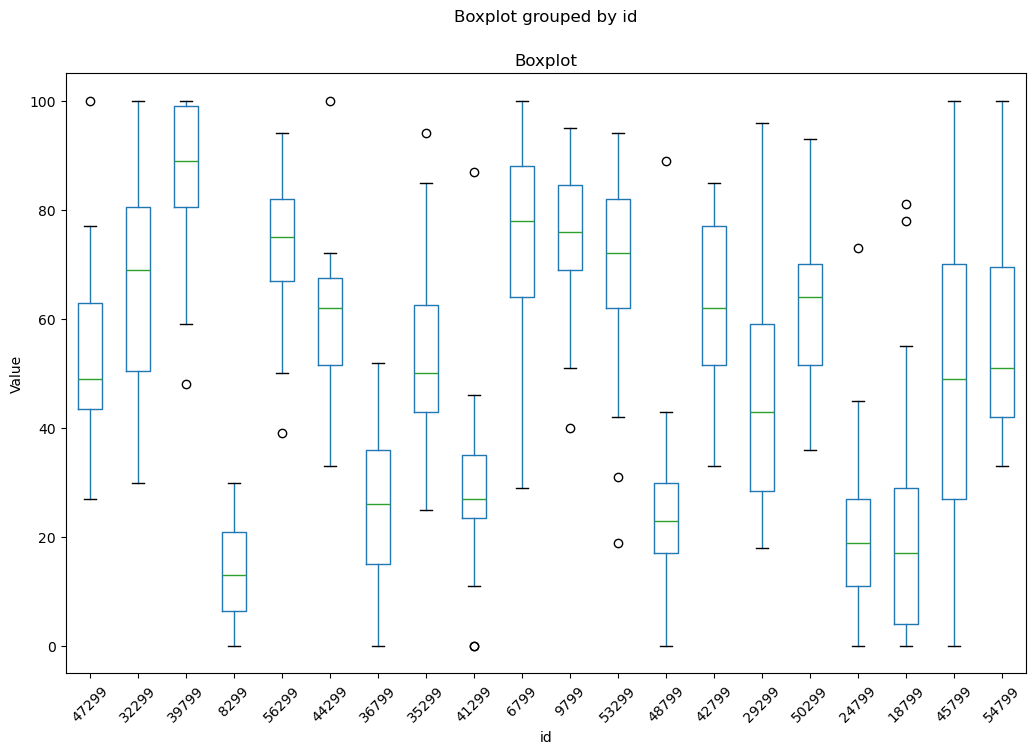

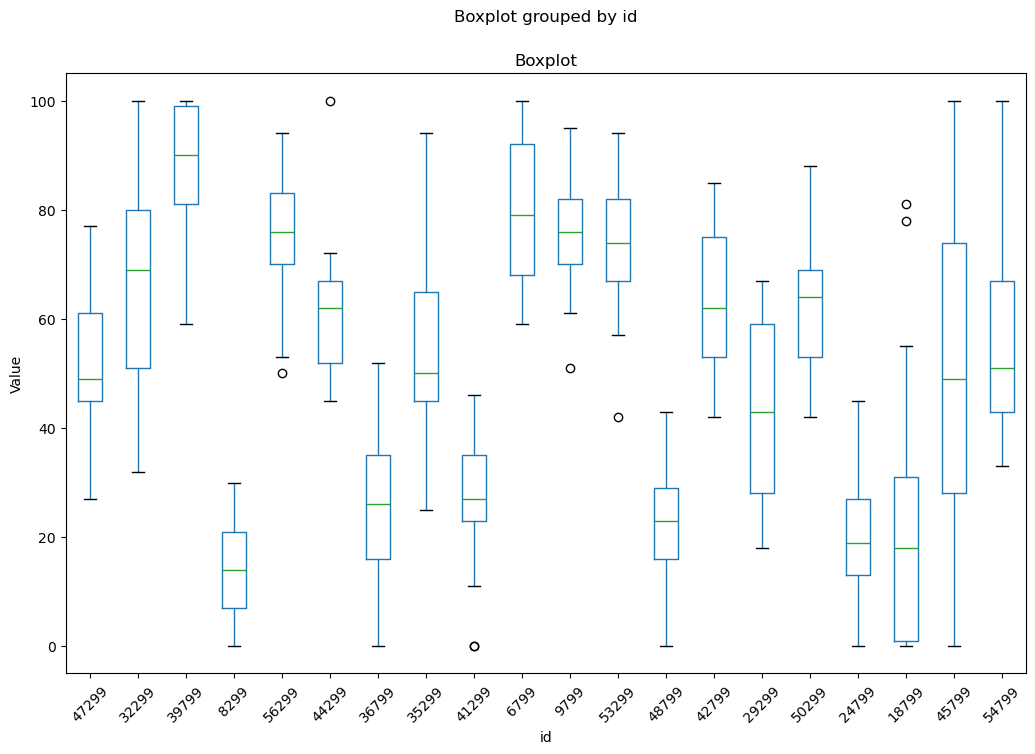